# **Loading the Data...**

In [2]:
# imports for the program
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sys
np.set_printoptions(threshold=np.inf)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI/roo_data.csv')
data

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,yes,no,no,app development,cloud computing,yes,no,poor,excellent,Software Engineering,system developer,job,Testing and Maintainance Services,no,yes,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,yes,no,no,full stack,game development,no,yes,medium,excellent,Management,Business process analyst,higherstudies,Product based,yes,yes,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,yes,yes,yes,information security,database security,yes,yes,medium,excellent,networks,cloud computing,higherstudies,SAaS services,yes,yes,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,no,no,no,full stack,cloud computing,no,yes,poor,poor,IOT,testing,job,Cloud Services,yes,no,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


# **Data Analysis**

In [4]:
# checking the unique number of job roles in this data
print(data['Suggested Job Role'].value_counts())
print("\nThe number of unique suggested job roles: ", len(np.array(data['Suggested Job Role'].unique())))

Network Security Administrator               1112
Network Security Engineer                     630
Network Engineer                              621
Project Manager                               602
Database Administrator                        593
Portal Administrator                          593
Information Technology Manager                591
Software Engineer                             590
UX Designer                                   589
Design & UX                                   588
Software Developer                            587
CRM Business Analyst                          584
Business Systems Analyst                      582
Database Developer                            581
Solutions Architect                           578
Software Systems Engineer                     575
Software Quality Assurance (QA) / Testing     571
Database Manager                              570
Web Developer                                 570
CRM Technical Developer                       567


The classes that are used here to later calculate the confusion matrix and class-wise accuracies of 34 classes are as follows:

In [5]:
data['Suggested Job Role'].unique()

array(['Database Developer', 'Portal Administrator',
       'Systems Security Administrator', 'Business Systems Analyst',
       'Software Systems Engineer', 'Business Intelligence Analyst',
       'CRM Technical Developer', 'Mobile Applications Developer',
       'UX Designer', 'Quality Assurance Associate', 'Web Developer',
       'Information Security Analyst', 'CRM Business Analyst',
       'Technical Support', 'Project Manager',
       'Information Technology Manager', 'Programmer Analyst',
       'Design & UX', 'Solutions Architect', 'Systems Analyst',
       'Network Security Administrator', 'Data Architect',
       'Software Developer', 'E-Commerce Analyst',
       'Technical Services/Help Desk/Tech Support',
       'Information Technology Auditor', 'Database Manager',
       'Applications Developer', 'Database Administrator',
       'Network Engineer', 'Software Engineer', 'Technical Engineer',
       'Network Security Engineer',
       'Software Quality Assurance (QA) / Testi

Converting the categorical data into numerical values using pandas factorize

In [6]:
# copying the original dataframe and do the modifications here
df = data.copy(deep=True)
df['can work long time before system?'] = pd.factorize(df['can work long time before system?'])[0]
df['self-learning capability?'] = pd.factorize(df['self-learning capability?'])[0]
df['Extra-courses did'] = pd.factorize(df['Extra-courses did'])[0]
df['certifications'] = pd.factorize(df['certifications'])[0]
df['workshops'] = pd.factorize(df['workshops'])[0]
df['talenttests taken?'] = pd.factorize(df['talenttests taken?'])[0]
df['olympiads'] = pd.factorize(df['olympiads'])[0]
df['reading and writing skills'] = pd.factorize(df['reading and writing skills'])[0]
df['memory capability score'] = pd.factorize(df['memory capability score'])[0]
df['Interested subjects'] = pd.factorize(df['Interested subjects'])[0]
df['interested career area '] = pd.factorize(df['interested career area '])[0]
df['Job/Higher Studies?'] = pd.factorize(df['Job/Higher Studies?'])[0]
df['Type of company want to settle in?'] = pd.factorize(df['Type of company want to settle in?'])[0]
df['Taken inputs from seniors or elders'] = pd.factorize(df['Taken inputs from seniors or elders'])[0]
df['interested in games'] = pd.factorize(df['interested in games'])[0]
df['Interested Type of Books'] = pd.factorize(df['Interested Type of Books'])[0]
df['Salary Range Expected'] = pd.factorize(df['Salary Range Expected'])[0]
df['In a Realtionship?'] = pd.factorize(df['In a Realtionship?'])[0]
df['Gentle or Tuff behaviour?'] = pd.factorize(df['Gentle or Tuff behaviour?'])[0]
df['Management or Technical'] = pd.factorize(df['Management or Technical'])[0]
df['Salary/work'] = pd.factorize(df['Salary/work'])[0]
df['hard/smart worker'] = pd.factorize(df['hard/smart worker'])[0]
df['worked in teams ever?'] = pd.factorize(df['worked in teams ever?'])[0]
df['Introvert'] = pd.factorize(df['Introvert'])[0]
df['Suggested Job Role'] = pd.factorize(df['Suggested Job Role'])[0]
df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,0,1,0,2,2,0,0,1,0,2,2,0,2,1,1,2,1,0,0,0,1,0,1,1,1
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,1,0,1,3,3,1,1,2,0,1,3,0,3,0,0,3,1,1,1,0,1,1,0,1,2
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,1,1,1,2,0,0,1,1,0,3,3,0,4,0,1,4,0,0,0,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,0,1,1,2,0,1,1,1,0,8,0,1,3,0,1,14,1,1,0,0,0,1,0,0,31
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,0,1,1,8,6,0,0,2,0,9,1,0,7,1,1,4,0,0,0,0,0,0,1,1,23
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,0,0,0,5,1,1,0,2,0,1,5,0,1,1,1,6,1,1,1,1,1,0,1,1,5
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,1,1,1,8,0,0,0,1,2,6,3,1,8,1,0,2,1,0,1,0,1,1,0,0,33


# **Attempt 1 - On Normal 34 Class Label Data**

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
# do on df dataframe
# Using Grid Search CV to obtain the best parameters and achieve the best score 
# with the MLP Classifier of Scikit Learn ANN
param_grid = {    
    'hidden_layer_sizes' : [20,50,100,150,200],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [100,200,300],
    'early_stopping' : [True]
}

In [ ]:
mlpc = MLPClassifier()
clf = GridSearchCV(mlpc, param_grid,cv = 5, n_jobs = -1, verbose=10)
clf.fit(df.drop(['Suggested Job Role'],axis=1),df['Suggested Job Role'])
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  5

{'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'adam'}
0.05595


Here we see the affect of multiple classes on the accuracy of a classification problem. In the presence of 34 classes of Suggested Job Roles, it becomes difficult for the ANN MLP Classifier to classify each data into their respective job roles given as target values. Hence making the accuracy around 5% which is very low.

Checking for different train-test splits: 60-40, 70-30, 80-20 and 90-10 respectively. 

## **Checking for 4 different Train-test splits**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
test_sizes = [0.4,0.3,0.2,0.1]
for ts in test_sizes:
  print('\033[1m'+"For Train-test split: "+ str(int(100-(ts*100)))+"-"+str(int(ts*100))+ '\033[0m' +"\n")
  X_train, X_test, y_train, y_test = train_test_split(df.drop(['Suggested Job Role'],axis=1),df['Suggested Job Role'], stratify=df['Suggested Job Role'], test_size=ts, random_state=1)
  mlpc_1 = MLPClassifier(hidden_layer_sizes=150, activation='tanh', solver='adam',batch_size='auto', learning_rate='invscaling', max_iter=200, verbose=False, early_stopping=True)
  mlpc_1.fit(X_train,y_train)
  y_pred = mlpc_1.predict(X_test)
  print("Accuracy: ",mlpc_1.score(X_test,y_test))
  print("\nConfusion Matrix for each class: ")
  matrix = confusion_matrix(y_test,y_pred,labels=np.array(df['Suggested Job Role'].unique()))
  print(np.array(matrix))
  print("\nClasswise Accuracies")
  print(matrix.diagonal()/matrix.sum(axis=1))
  print("--------------------------------------------------------------")

For Train-test split: 60-40

Accuracy:  0.055375

Confusion Matrix for each class: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0
    0   0 229   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0
    0   0 234   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0   0   0   0   0
    0   0 219   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0 231   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0
    0   0 227   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5   0   0   0   0   0
    0   0 210   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4   0   0   0   0 

#**Reducing the number of Classes to a lower value**

Trying to transform the data using standard scaler in order to assess the data clusters well

In [ ]:
X = df.drop(['Suggested Job Role'],axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(pd.DataFrame(X))

             0         1         2   ...        35        36        37
0     -0.793450 -1.380807  0.096941  ... -1.004711 -1.005415 -1.009748
1      0.098925 -1.479803 -0.396421  ... -1.004711  0.994615  0.990347
2     -0.595145  0.896086  1.379680  ... -1.004711  0.994615  0.990347
3     -0.099381  0.995082 -1.679160  ...  0.995311 -1.005415  0.990347
4      1.487064 -1.479803  1.281008  ... -1.004711 -1.005415  0.990347
...         ...       ...       ...  ...       ...       ...       ...
19995  0.594689 -0.984826 -1.481815  ...  0.995311 -1.005415 -1.009748
19996  0.297230 -0.786835  0.590302  ... -1.004711  0.994615  0.990347
19997  0.594689 -0.687840  0.294285  ... -1.004711  0.994615  0.990347
19998 -0.892603  0.995082  1.379680  ...  0.995311 -1.005415 -1.009748
19999 -0.396839  0.005128 -0.297748  ... -1.004711 -1.005415 -1.009748

[20000 rows x 38 columns]


In order to convert this data into a fewer class based clasification problem, we need to understand the optimum number of clusters in which the data can be best summed up with.

This can be done using the Elbow Method using K-Means Clustering Model to find the optimum number of clusters

In [40]:
from sklearn.cluster import KMeans

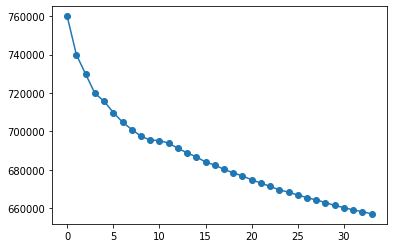

In [ ]:
# X = df.drop(['Suggested Job Role'],axis=1)
wcss = []
for c in range(1,35):
  kmeans = KMeans(n_clusters=c, random_state=0).fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(wcss,marker='o')
plt.show()

On the basis of this graph we see that the elbow forms at around the range of 7-9, therefore let us convert this data into a 8-9 class classification task to check the accuracy of our model.

In [10]:
data

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,yes,no,no,app development,cloud computing,yes,no,poor,excellent,Software Engineering,system developer,job,Testing and Maintainance Services,no,yes,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,yes,no,no,full stack,game development,no,yes,medium,excellent,Management,Business process analyst,higherstudies,Product based,yes,yes,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,yes,yes,yes,information security,database security,yes,yes,medium,excellent,networks,cloud computing,higherstudies,SAaS services,yes,yes,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,no,no,no,full stack,cloud computing,no,yes,poor,poor,IOT,testing,job,Cloud Services,yes,no,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


In [12]:
data_copy = data.copy(deep=True)
data_copy

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,yes,no,no,app development,cloud computing,yes,no,poor,excellent,Software Engineering,system developer,job,Testing and Maintainance Services,no,yes,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,yes,no,no,full stack,game development,no,yes,medium,excellent,Management,Business process analyst,higherstudies,Product based,yes,yes,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,yes,yes,yes,information security,database security,yes,yes,medium,excellent,networks,cloud computing,higherstudies,SAaS services,yes,yes,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,no,no,no,full stack,cloud computing,no,yes,poor,poor,IOT,testing,job,Cloud Services,yes,no,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


The class labels will be merged on the basis of these combinations: <br> 
1. Security Engineer
  *   Network Security Administrator
  *   Network Security Engineer
  *   Systems Security Administrator
  *   Network Engineer
  *   Portal Administrator
2. Business Analyst
  *   CRM Business Analyst
  *   Business System Analyst
  *   E-commerce Analyst
  *   Business Intelligence Analyst
3. Analyst
  *   Systems Analyst
  *   Information Security Analyst
  *   Programmer Analyst
4. Developer
  *   Software Developer
  *   Database Developer
  *   Web Developer
  *   CRM Technical Developer
  *   Applications Developer
  *   Mobile Applications Developer
5. UX Design
  *   UX Designer
  *   Design and UX
6. Software
  *   Software Engineer
  *   Software Systems Engineer
  *   Software Quality Assurance
  *   Quality Assurance Associate
  *   Project Manager
7. Technical Supports Engineer
  *   Technical Support
  *   Technical Services/Helpdesk/Tech Support
  *   Technical Engineer
  *   Solutions Architect
8. Data Engineer
  *   Database Administrator
  *   Database Manager
  *   Data Architect
9. Information Technology
  *   Information Technology Manager
  *   Information Technology Auditor
  

In [15]:
data_copy = pd.DataFrame(data_copy)
data

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,yes,no,no,app development,cloud computing,yes,no,poor,excellent,Software Engineering,system developer,job,Testing and Maintainance Services,no,yes,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,yes,no,no,full stack,game development,no,yes,medium,excellent,Management,Business process analyst,higherstudies,Product based,yes,yes,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,yes,yes,yes,information security,database security,yes,yes,medium,excellent,networks,cloud computing,higherstudies,SAaS services,yes,yes,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,no,no,no,full stack,cloud computing,no,yes,poor,poor,IOT,testing,job,Cloud Services,yes,no,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


In [16]:
df_new = pd.DataFrame()
#temp_df = pd.DataFrame()
#-----------------------LABEL 1--------------------------------
temp_df = pd.DataFrame(data_copy.loc[(data_copy['Suggested Job Role']=='Network Security Administrator') | (data_copy['Suggested Job Role']=='Network Security Engineer') | (data_copy['Suggested Job Role']=='Network Engineer') | (data_copy['Suggested Job Role']=='Systems Security Administrator')  | (data_copy['Suggested Job Role']=='Portal Administrator')])
temp_df['New Job Label'] = ['Security Engineer']*len(temp_df)
#print(temp_df['Suggested Job Role'].value_counts())
df_new = df_new.append(temp_df)

#-----------------------LABEL 2--------------------------------
temp_df = pd.DataFrame(data_copy.loc[(data_copy['Suggested Job Role']=='CRM Business Analyst') | (data_copy['Suggested Job Role']=='Business Systems Analyst') | (data_copy['Suggested Job Role']=='E-Commerce Analyst') | (data_copy['Suggested Job Role']=='Business Intelligence Analyst')])
temp_df['New Job Label'] = ['Business Analyst']*len(temp_df)
#print(temp_df['Suggested Job Role'].value_counts())
df_new = df_new.append(temp_df)

#-----------------------LABEL 3--------------------------------
temp_df = pd.DataFrame(data_copy.loc[(data_copy['Suggested Job Role']=='Systems Analyst') | (data_copy['Suggested Job Role']=='Information Security Analyst') | (data_copy['Suggested Job Role']=='Programmer Analyst')])
temp_df['New Job Label'] = ['Analyst']*len(temp_df)
#print(temp_df['Suggested Job Role'].value_counts())
df_new = df_new.append(temp_df)

#-----------------------LABEL 4--------------------------------
temp_df = pd.DataFrame(data_copy.loc[(data_copy['Suggested Job Role']=='Software Developer') | (data_copy['Suggested Job Role']=='Database Developer') | (data_copy['Suggested Job Role']=='Web Developer') | (data_copy['Suggested Job Role']=='CRM Technical Developer') | (data_copy['Suggested Job Role']=='Applications Developer') | (data_copy['Suggested Job Role']=='Mobile Applications Developer')])
temp_df['New Job Label'] = ['Developer']*len(temp_df)
#print(temp_df['Suggested Job Role'].value_counts())
df_new = df_new.append(temp_df)

#-----------------------LABEL 5--------------------------------
temp_df = pd.DataFrame(data_copy.loc[(data_copy['Suggested Job Role']=='UX Designer') | (data_copy['Suggested Job Role']=='Design & UX')])
temp_df['New Job Label'] = ['UX Design']*len(temp_df)
#print(temp_df['Suggested Job Role'].value_counts())
df_new = df_new.append(temp_df)

#-----------------------LABEL 6--------------------------------
temp_df = pd.DataFrame(data_copy.loc[(data_copy['Suggested Job Role']=='Software Engineer') | (data_copy['Suggested Job Role']=='Software Systems Engineer') | (data_copy['Suggested Job Role']=='Software Quality Assurance (QA) / Testing') | (data_copy['Suggested Job Role']=='Quality Assurance Associate') | (data_copy['Suggested Job Role']=='Project Manager')])
temp_df['New Job Label'] = ['Software']*len(temp_df)
#print(temp_df['Suggested Job Role'].value_counts())
df_new = df_new.append(temp_df)

#-----------------------LABEL 7--------------------------------
temp_df = pd.DataFrame(data_copy.loc[(data_copy['Suggested Job Role']=='Technical Support') | (data_copy['Suggested Job Role']=='Technical Services/Help Desk/Tech Support') | (data_copy['Suggested Job Role']=='Technical Engineer') | (data_copy['Suggested Job Role']=='Solutions Architect')])
temp_df['New Job Label'] = ['Technical Supports Engineer']*len(temp_df)
#print(temp_df['Suggested Job Role'].value_counts())
df_new = df_new.append(temp_df)

#-----------------------LABEL 8--------------------------------
temp_df = pd.DataFrame(data_copy.loc[(data_copy['Suggested Job Role']=='Database Administrator') | (data_copy['Suggested Job Role']=='Database Manager') | (data_copy['Suggested Job Role']=='Data Architect')])
temp_df['New Job Label'] = ['Data Engineer']*len(temp_df)
#print(temp_df['Suggested Job Role'].value_counts())
df_new = df_new.append(temp_df)

#-----------------------LABEL 9--------------------------------
temp_df = pd.DataFrame(data_copy.loc[(data_copy['Suggested Job Role']=='Information Technology Manager') | (data_copy['Suggested Job Role']=='Information Technology Auditor')])
temp_df['New Job Label'] = ['Information Technology']*len(temp_df)
#print(temp_df['Suggested Job Role'].value_counts())
df_new = df_new.append(temp_df)


#print(df_new['Suggested Job Role'].value_counts())
print("Original class count: ",len(np.array(df_new['Suggested Job Role'].unique())))
print("New class count: ",len(np.array(df_new['New Job Label'].unique())))
print("\n")
print(df_new)

Original class count:  34
New class count:  9


       Acedamic percentage in Operating Systems  ...           New Job Label
1                                            78  ...       Security Engineer
2                                            71  ...       Security Engineer
3                                            76  ...       Security Engineer
32                                           80  ...       Security Engineer
38                                           70  ...       Security Engineer
...                                         ...  ...                     ...
19925                                        89  ...  Information Technology
19934                                        67  ...  Information Technology
19973                                        64  ...  Information Technology
19986                                        74  ...  Information Technology
19991                                        77  ...  Information Technology

[20000 rows x 40 columns]


Here the different classes for which the confusion matrices and class-wise accuracies will be calculated later are as follows:

In [17]:
df_new['New Job Label'].unique()

array(['Security Engineer', 'Business Analyst', 'Analyst', 'Developer',
       'UX Design', 'Software', 'Technical Supports Engineer',
       'Data Engineer', 'Information Technology'], dtype=object)

In [18]:
# copying the new (reduced class) dataframe and do the modifications here - converting categorical to numerical data for further analysis and computations
copy_df = df_new.copy(deep=True)
#print(copy_df)
copy_df['can work long time before system?'] = pd.factorize(copy_df['can work long time before system?'])[0]
copy_df['self-learning capability?'] = pd.factorize(copy_df['self-learning capability?'])[0]
copy_df['Extra-courses did'] = pd.factorize(copy_df['Extra-courses did'])[0]
copy_df['certifications'] = pd.factorize(copy_df['certifications'])[0]
copy_df['workshops'] = pd.factorize(copy_df['workshops'])[0]
copy_df['talenttests taken?'] = pd.factorize(copy_df['talenttests taken?'])[0]
copy_df['olympiads'] = pd.factorize(copy_df['olympiads'])[0]
copy_df['reading and writing skills'] = pd.factorize(copy_df['reading and writing skills'])[0]
copy_df['memory capability score'] = pd.factorize(copy_df['memory capability score'])[0]
copy_df['Interested subjects'] = pd.factorize(copy_df['Interested subjects'])[0]
copy_df['interested career area '] = pd.factorize(copy_df['interested career area '])[0]
copy_df['Job/Higher Studies?'] = pd.factorize(copy_df['Job/Higher Studies?'])[0]
copy_df['Type of company want to settle in?'] = pd.factorize(copy_df['Type of company want to settle in?'])[0]
copy_df['Taken inputs from seniors or elders'] = pd.factorize(copy_df['Taken inputs from seniors or elders'])[0]
copy_df['interested in games'] = pd.factorize(copy_df['interested in games'])[0]
copy_df['Interested Type of Books'] = pd.factorize(copy_df['Interested Type of Books'])[0]
copy_df['Salary Range Expected'] = pd.factorize(copy_df['Salary Range Expected'])[0]
copy_df['In a Realtionship?'] = pd.factorize(copy_df['In a Realtionship?'])[0]
copy_df['Gentle or Tuff behaviour?'] = pd.factorize(copy_df['Gentle or Tuff behaviour?'])[0]
copy_df['Management or Technical'] = pd.factorize(copy_df['Management or Technical'])[0]
copy_df['Salary/work'] = pd.factorize(copy_df['Salary/work'])[0]
copy_df['hard/smart worker'] = pd.factorize(copy_df['hard/smart worker'])[0]
copy_df['worked in teams ever?'] = pd.factorize(copy_df['worked in teams ever?'])[0]
copy_df['Introvert'] = pd.factorize(copy_df['Introvert'])[0]
copy_df['Suggested Job Role'] = pd.factorize(copy_df['Suggested Job Role'])[0]
copy_df['New Job Label'] = pd.factorize(copy_df['New Job Label'])[0]
copy_df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role,New Job Label
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,1,1,1,2,2,1,0,1,1,0,2,1,2,1,1,2,1,0,0,1,1,1,1,0,1,0
32,80,85,68,64,86,62,78,87,87,7,7,4,7,5,0,1,1,3,3,0,1,2,1,2,2,0,3,0,1,3,1,1,1,0,1,0,0,1,1,0
38,70,71,65,84,86,72,79,68,63,8,8,0,4,7,0,0,1,4,4,1,0,1,0,2,2,0,3,0,0,4,1,0,1,0,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19925,89,64,91,94,67,71,85,67,79,5,6,0,1,3,1,1,0,7,3,1,0,0,1,8,4,0,4,0,1,10,1,0,1,1,0,0,0,0,33,8
19934,67,66,90,88,81,93,92,74,91,7,6,1,9,7,0,0,0,1,1,0,0,2,2,8,2,1,0,0,1,5,1,1,1,0,0,1,0,1,33,8
19973,64,66,72,74,89,82,80,70,84,5,1,0,2,5,1,1,0,2,6,1,1,0,1,1,4,1,5,0,1,11,0,1,1,1,0,0,0,1,32,8
19986,74,72,65,71,72,68,90,89,63,6,5,0,8,5,1,1,1,3,1,0,1,2,2,3,3,1,5,1,1,10,0,0,0,0,1,0,0,1,32,8


# **Attempt 2 - On Manually Combined 9 class data**

Now building model on this and finding optimal parameters to train and evaluate Scikit-Learn ANN MLP Classifier Model

In [ ]:
mlpc2 = MLPClassifier()
clf2 = GridSearchCV(mlpc2, param_grid,cv = 5, n_jobs = -1, verbose=10)
clf2.fit(copy_df.drop(['Suggested Job Role','New Job Label'],axis=1),copy_df['New Job Label'])
print(clf2.best_params_)
print(clf2.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 200, 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'sgd'}
0.17824999999999996


## **Checking for 4 different Train-test splits**

In [ ]:
test_sizes = [0.4,0.3,0.2,0.1]
for ts2 in test_sizes:
  print('\033[1m'+"For Train-test split: "+ str(int(100-(ts2*100)))+"-"+str(int(ts2*100))+ '\033[0m' +"\n")
  X_train, X_test, y_train, y_test = train_test_split(copy_df.drop(['Suggested Job Role','New Job Label'],axis=1),copy_df['New Job Label'], stratify=copy_df['New Job Label'], test_size=ts2, random_state=1)
  mlpc_2 = MLPClassifier(hidden_layer_sizes=200, activation='relu', solver='sgd',batch_size='auto', learning_rate='adaptive', max_iter=200, verbose=False, early_stopping=True)
  mlpc_2.fit(X_train,y_train)
  y_pred = mlpc_2.predict(X_test)
  print("Accuracy: ",mlpc_2.score(X_test,y_test))
  print("\nConfusion Matrix for each class: ")
  matrix = confusion_matrix(y_test,y_pred,labels=np.array(copy_df['New Job Label'].unique()))
  print(np.array(matrix))
  print("\nClasswise Accuracies")
  print(matrix.diagonal()/matrix.sum(axis=1))
  print("--------------------------------------------------------------")

For Train-test split: 60-40

Accuracy:  0.171

Confusion Matrix for each class: 
[[ 355    0    0 1046    0    6    0    0    0]
 [ 224    0    0  673    0    4    0    0    0]
 [ 160    0    0  489    0    0    0    0    0]
 [ 343    0    0 1008    0    6    0    0    0]
 [ 120    0    0  351    0    0    0    0    0]
 [ 291    0    0  865    0    5    0    0    0]
 [ 229    0    0  674    0    0    0    0    0]
 [ 158    0    0  531    0    2    0    0    0]
 [ 125    0    0  334    0    1    0    0    0]]

Classwise Accuracies
[0.25230988 0.         0.         0.74281503 0.         0.00430663
 0.         0.         0.        ]
--------------------------------------------------------------
For Train-test split: 70-30

Accuracy:  0.17616666666666667

Confusion Matrix for each class: 
[[1055    0    0    0    0    0    0    0    0]
 [ 674    0    0    2    0    0    0    0    0]
 [ 486    0    0    1    0    0    0    0    0]
 [1015    1    0    2    0    0    0    0    0]
 [ 352    0 

# **Standard Scaling the Manually Labelled Data to evaluate ANN Model Performance**

In [21]:
Xhat = copy_df.drop(['Suggested Job Role','New Job Label'],axis=1)
scaler2 = StandardScaler()
Xhat = scaler2.fit_transform(Xhat)
print(pd.DataFrame(Xhat))

             0         1         2   ...        35        36        37
0      0.098925 -1.479803 -0.396421  ... -1.004711 -0.994615 -0.990347
1     -0.595145  0.896086  1.379680  ... -1.004711 -0.994615 -0.990347
2     -0.099381  0.995082 -1.679160  ...  0.995311  1.005415 -0.990347
3      0.297230  0.797091 -0.889782  ... -1.004711 -0.994615  1.009748
4     -0.694298 -0.588844 -1.185799  ...  0.995311 -0.994615 -0.990347
...         ...       ...       ...  ...       ...       ...       ...
19995  1.189605 -1.281812  1.379680  ... -1.004711 -0.994615 -0.990347
19996 -0.991756 -1.083821  1.281008  ...  0.995311 -0.994615  1.009748
19997 -1.289214 -1.083821 -0.495093  ... -1.004711 -0.994615  1.009748
19998 -0.297686 -0.489849 -1.185799  ... -1.004711 -0.994615  1.009748
19999 -0.000228  1.391063 -0.297748  ... -1.004711 -0.994615 -0.990347

[20000 rows x 38 columns]


# **Attempt 3 - Standard Scaling On Manually Combined 9 class data**

Now building model on this and finding optimal parameters using Grid Search to train and evaluate Scikit-Learn ANN MLP Classifier Model

In [ ]:
mlpc3 = MLPClassifier()
clf3 = GridSearchCV(mlpc3, param_grid,cv = 5, n_jobs = -1, verbose=10)
clf3.fit(Xhat,copy_df['New Job Label'])
print(clf3.best_params_)
print(clf3.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

{'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'sgd'}
0.1783


## **Checking for 4 different Train-test splits**

In [ ]:
test_sizes = [0.4,0.3,0.2,0.1]
for ts3 in test_sizes:
  print('\033[1m'+"For Train-test split: "+ str(int(100-(ts3*100)))+"-"+str(int(ts3*100))+ '\033[0m' +"\n")
  X_train, X_test, y_train, y_test = train_test_split(Xhat,copy_df['New Job Label'], stratify=copy_df['New Job Label'], test_size=ts3, random_state=1)
  mlpc_3 = MLPClassifier(hidden_layer_sizes=100, activation='logistic', solver='sgd',batch_size='auto', learning_rate='adaptive', max_iter=200, verbose=False, early_stopping=True)
  mlpc_3.fit(X_train,y_train)
  y_pred = mlpc_3.predict(X_test)
  print("Accuracy: ",mlpc_3.score(X_test,y_test))
  print("\nConfusion Matrix for each class: ")
  matrix = confusion_matrix(y_test,y_pred,labels=np.array(copy_df['New Job Label'].unique()))
  print(np.array(matrix))
  print("\nClasswise Accuracies")
  print(matrix.diagonal()/matrix.sum(axis=1))
  print("--------------------------------------------------------------")

For Train-test split: 60-40

Accuracy:  0.171875

Confusion Matrix for each class: 
[[1009    0    0  360    0   38    0    0    0]
 [ 650    0    0  235    0   16    0    0    0]
 [ 474    0    0  164    0   11    0    0    0]
 [ 990    0    0  339    0   28    0    0    0]
 [ 339    0    0  122    0   10    0    0    0]
 [ 836    0    0  298    0   27    0    0    0]
 [ 643    0    0  243    0   17    0    0    0]
 [ 481    0    0  204    0    6    0    0    0]
 [ 332    0    0  124    0    4    0    0    0]]

Classwise Accuracies
[0.71712864 0.         0.         0.24981577 0.         0.02325581
 0.         0.         0.        ]
--------------------------------------------------------------
For Train-test split: 70-30

Accuracy:  0.17983333333333335

Confusion Matrix for each class: 
[[585   0   0 430   0  40   0   0   0]
 [372   0   0 293   0  11   0   0   0]
 [268   0   0 206   0  13   0   0   0]
 [538   0   0 456   0  24   0   0   0]
 [195   0   0 147   0  11   0   0   0]
 [491 

# **Computing Feature Importance based on label manual clustering**

Now let us see which features were considered important in the case of this data.

In [20]:
from sklearn.metrics import accuracy_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(Xhat,copy_df['New Job Label'], stratify=copy_df['New Job Label'],  random_state=1)
mlpc3 = MLPClassifier(hidden_layer_sizes=100, activation='logistic', solver='sgd',batch_size='auto', learning_rate='adaptive', max_iter=200, verbose=False, early_stopping=True)
mlpc3.fit(Xhat,copy_df['New Job Label'])
y_pred = mlpc3.predict(X_test)

In [25]:
def get_feature_importance(j, n,clf):
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = clf.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

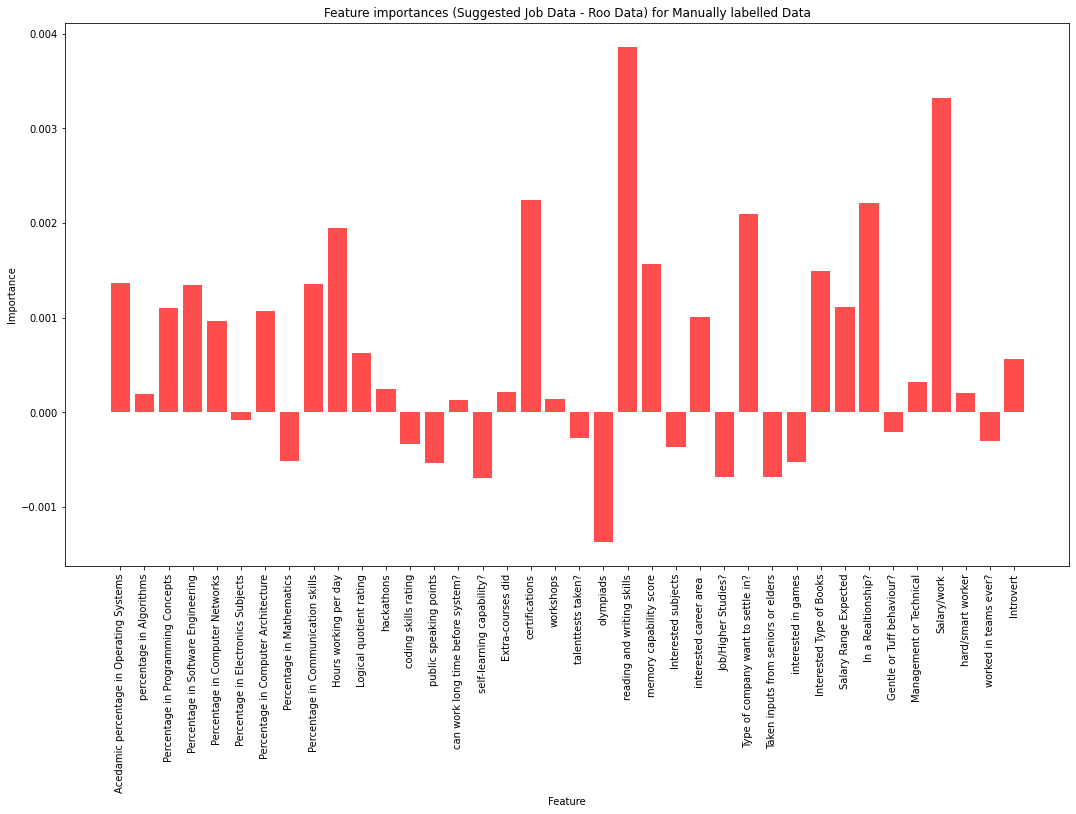

In [39]:
# Feature importances
f = []
for j in range(Xhat.shape[1]):
  f_j = get_feature_importance(j, 100, mlpc3)
  f.append(f_j)
# Plot
plt.figure(figsize=(18, 10))
plt.bar(range(Xhat.shape[1]), f, color="r", alpha=0.7)
plt.xticks(range(X_test.shape[1]), np.array(copy_df.drop(['Suggested Job Role','New Job Label'],axis=1).columns), rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances (Suggested Job Data - Roo Data) for Manually labelled Data")
plt.show()

In [55]:
print('\033[1m'+"The important features according to the manually labelled data and model are: "+ '\033[0m')
features_index = [9,17,20,21,26,31,34]
for col_num in features_index:
  # print(col_num)
  print(np.array(copy_df.drop(['Suggested Job Role','New Job Label'],axis=1).columns)[col_num])

The important features according to the manually labelled data and model are: 
Hours working per day
certifications
olympiads
reading and writing skills
Type of company want to settle in?
In a Realtionship?
Salary/work


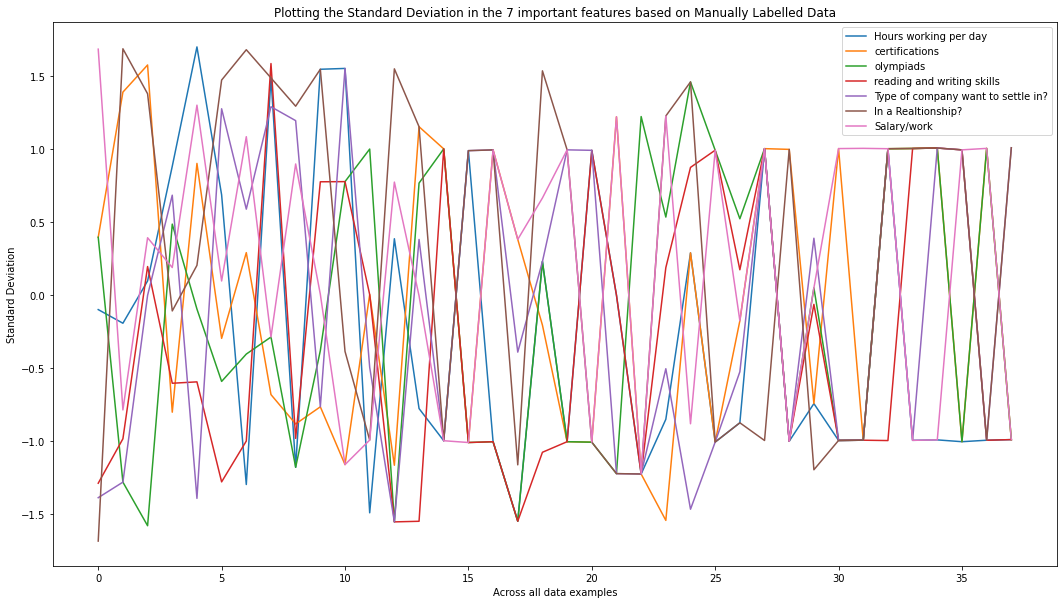

In [58]:
# plotting the standard deviations for the 8 important attributes or features according to the MLP ANN Classifier
fig, ax = plt.subplots(figsize=(18, 10))

plt.plot(Xhat[9],label = 'Hours working per day')
plt.plot(Xhat[17],label = 'certifications')
plt.plot(Xhat[20],label = 'olympiads')
plt.plot(Xhat[21],label = 'reading and writing skills')
plt.plot(Xhat[26],label = 'Type of company want to settle in?')
plt.plot(Xhat[31],label = 'In a Realtionship?')
plt.plot(Xhat[34],label = 'Salary/work')
plt.legend()
plt.title("Plotting the Standard Deviation in the 7 important features based on Manually Labelled Data")
plt.ylabel("Standard Deviation")
plt.xlabel("Across all data examples")
plt.show()

# **Checking based on K Means cluster labels**

Since the optimum number of clusters obtained after applying the KMeans algorithm Within Cluster Sum Of Squares (WCSS) Elbow Method is equal to 9 therefore we will be generating 9 cluster labels for the data and check the model performance for the same.

In [41]:
kmeans2 = KMeans(n_clusters=9).fit(df.drop(['Suggested Job Role'],axis=1),df['Suggested Job Role'])
new_cluster_data = pd.DataFrame(df.drop(['Suggested Job Role'],axis=1))
new_cluster_data['Job Labels'] = data['Suggested Job Role']
new_cluster_data['Cluster Labels'] = kmeans2.labels_
new_cluster_data

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Job Labels,Cluster Labels
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Developer,7
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,Portal Administrator,6
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,0,1,0,2,2,0,0,1,0,2,2,0,2,1,1,2,1,0,0,0,1,0,1,1,Portal Administrator,4
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,1,0,1,3,3,1,1,2,0,1,3,0,3,0,0,3,1,1,1,0,1,1,0,1,Systems Security Administrator,1
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,1,1,1,2,0,0,1,1,0,3,3,0,4,0,1,4,0,0,0,0,1,0,0,1,Business Systems Analyst,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,0,1,1,2,0,1,1,1,0,8,0,1,3,0,1,14,1,1,0,0,0,1,0,0,Technical Engineer,7
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,0,1,1,8,6,0,0,2,0,9,1,0,7,1,1,4,0,0,0,0,0,0,1,1,E-Commerce Analyst,1
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,0,0,0,5,1,1,0,2,0,1,5,0,1,1,1,6,1,1,1,1,1,0,1,1,Business Intelligence Analyst,4
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,1,1,1,8,0,0,0,1,2,6,3,1,8,1,0,2,1,0,1,0,1,1,0,0,Software Quality Assurance (QA) / Testing,1


Let us now check the different job roles that were clustered together as same cluster labels...

In [42]:
job_cluster_dict = {}
num_jobs_in_clusters = {}
for c in range(len(new_cluster_data['Cluster Labels'].unique())):
  #print(c)
  job_array = np.array(new_cluster_data.loc[new_cluster_data['Cluster Labels'] == c]['Job Labels'].unique())
  job_cluster_dict[c] = job_array
  num_jobs_in_clusters[c] = len(job_array)
#print(job_cluster_dict)
print(num_jobs_in_clusters)

{0: 34, 1: 34, 2: 34, 3: 34, 4: 34, 5: 34, 6: 34, 7: 34, 8: 34}


This analysis done above shows that each cluster formed contains all the 34 original job classes which hinders the process of predicting and suggesting a suitable job role to students.

# **Attempt 4 - On KMeans Cluster Labelled Data**

Now building model on this and finding optimal parameters using Grid Search to train and evaluate Scikit-Learn ANN MLP Classifier Model

In [ ]:
mlpc4 = MLPClassifier()
clf4 = GridSearchCV(mlpc4, param_grid,cv = 5, n_jobs = -1, verbose=10)
clf4.fit(new_cluster_data.drop(['Job Labels','Cluster Labels'],axis=1),new_cluster_data['Cluster Labels'])
print(clf4.best_params_)
print(clf4.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

{'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 200, 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
0.8121499999999999


## **Checking for 4 different Train-test splits**

In [ ]:
test_sizes = [0.4,0.3,0.2,0.1]
for ts4 in test_sizes:
  print('\033[1m'+"For Train-test split: "+ str(int(100-(ts4*100)))+"-"+str(int(ts4*100))+ '\033[0m' +"\n")
  X_train, X_test, y_train, y_test = train_test_split(new_cluster_data.drop(['Job Labels','Cluster Labels'],axis=1),new_cluster_data['Cluster Labels'], stratify=new_cluster_data['Cluster Labels'], test_size=ts4, random_state=1)
  mlpc_4 = MLPClassifier(hidden_layer_sizes=200, activation='logistic', solver='adam',batch_size='auto', learning_rate='adaptive', max_iter=100, verbose=False, early_stopping=True)
  mlpc_4.fit(X_train,y_train)
  y_pred = mlpc_4.predict(X_test)
  print("Accuracy: ",mlpc_4.score(X_test,y_test))
  print("\nConfusion Matrix for each class: ")
  matrix = confusion_matrix(y_test,y_pred,labels=np.array(copy_df['New Job Label'].unique()))
  print(np.array(matrix))
  print("\nClasswise Accuracies")
  print(matrix.diagonal()/matrix.sum(axis=1))
  print("--------------------------------------------------------------")

For Train-test split: 60-40

Accuracy:  0.804

Confusion Matrix for each class: 
[[794  21   4  17  27   0  16   3   9]
 [ 82 433 114  21   3  40  41  69  75]
 [  6  30 708  29  60   5  26   7  21]
 [ 17   4  28 755  10  16  21  18  18]
 [ 47   0  75  14 586  41  45  39  51]
 [ 16  19  18  12  45 742  18   8  12]
 [  6   8  11   5   8   1 872   0   7]
 [  8  25  11  12  35   1  15 716  21]
 [  1  19   7  10  29   1   8   1 826]]

Classwise Accuracies
[0.89113356 0.49316629 0.79372197 0.85118377 0.65256125 0.83370787
 0.94989107 0.84834123 0.91574279]
--------------------------------------------------------------
For Train-test split: 70-30

Accuracy:  0.8033333333333333

Confusion Matrix for each class: 
[[543  44   1  10  35  14   9   1  11]
 [ 27 459  48   6   0  27  22  32  38]
 [  1  59 493  23  57  12   9   5  10]
 [ 13   7  18 565  10  24   6  13   9]
 [ 26   3  53   8 435  53  22  32  41]
 [  0  21   4   6  18 613   3   1   1]
 [  4  24  10   6   9  16 595   9  16]
 [  5  40   6

# **Standard Scaling the Data for KMeans Optimal 9 clusters**

In [43]:
# new_cluster_data.drop(['Job Labels','Cluster Labels'],axis=1)
Xhat2 = new_cluster_data.drop(['Job Labels','Cluster Labels'],axis=1)
scaler2 = StandardScaler()
Xhat2 = scaler2.fit_transform(Xhat2)
print(pd.DataFrame(Xhat2))

             0         1         2   ...        35        36        37
0     -0.793450 -1.380807  0.096941  ... -1.004711 -1.005415 -1.009748
1      0.098925 -1.479803 -0.396421  ... -1.004711  0.994615  0.990347
2     -0.595145  0.896086  1.379680  ... -1.004711  0.994615  0.990347
3     -0.099381  0.995082 -1.679160  ...  0.995311 -1.005415  0.990347
4      1.487064 -1.479803  1.281008  ... -1.004711 -1.005415  0.990347
...         ...       ...       ...  ...       ...       ...       ...
19995  0.594689 -0.984826 -1.481815  ...  0.995311 -1.005415 -1.009748
19996  0.297230 -0.786835  0.590302  ... -1.004711  0.994615  0.990347
19997  0.594689 -0.687840  0.294285  ... -1.004711  0.994615  0.990347
19998 -0.892603  0.995082  1.379680  ...  0.995311 -1.005415 -1.009748
19999 -0.396839  0.005128 -0.297748  ... -1.004711 -1.005415 -1.009748

[20000 rows x 38 columns]


# **Attempt 5 - Standard Scaling on KMeans Cluster Labelled Data**

Now building model on this and finding optimal parameters using Grid Search to train and evaluate Scikit-Learn ANN MLP Classifier Model

In [ ]:
mlpc5 = MLPClassifier()
clf5 = GridSearchCV(mlpc5, param_grid,cv = 5, n_jobs = -1, verbose=10)
clf5.fit(Xhat2,new_cluster_data['Cluster Labels'])
print(clf5.best_params_)
print(clf5.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

{'activation': 'identity', 'early_stopping': True, 'hidden_layer_sizes': 200, 'learning_rate': 'invscaling', 'max_iter': 100, 'solver': 'lbfgs'}
0.99215


## **Checking for 4 different Train-test splits**

In [44]:
test_sizes = [0.4,0.3,0.2,0.1]
for ts5 in test_sizes:
  print('\033[1m'+"For Train-test split: "+ str(int(100-(ts5*100)))+"-"+str(int(ts5*100))+ '\033[0m' +"\n")
  X_train, X_test, y_train, y_test = train_test_split(Xhat2,new_cluster_data['Cluster Labels'], stratify=new_cluster_data['Cluster Labels'], test_size=ts5, random_state=1)
  mlpc_5 = MLPClassifier(hidden_layer_sizes=200, activation='identity', solver='lbfgs',batch_size='auto', learning_rate='invscaling', max_iter=100, verbose=False, early_stopping=True)
  mlpc_5.fit(X_train,y_train)
  y_pred = mlpc_5.predict(X_test)
  print("Accuracy: ",mlpc_5.score(X_test,y_test))
  print("\nConfusion Matrix for each class: ")
  matrix = confusion_matrix(y_test,y_pred,labels=np.array(copy_df['New Job Label'].unique()))
  print(np.array(matrix))
  print("\nClasswise Accuracies")
  print(matrix.diagonal()/matrix.sum(axis=1))
  print("--------------------------------------------------------------")

For Train-test split: 60-40

Accuracy:  0.988875

Confusion Matrix for each class: 
[[898   1   0   0   3   2   2   2   0]
 [  2 866   1   1   2   0   0   2   2]
 [  0   1 898   2   0   0   4   1   1]
 [  4   2   1 849   0   1   2   1   0]
 [  1   1   0   2 881   1   1   0   1]
 [  0   3   1   2   1 863   2   2   5]
 [  1   0   0   1   1   1 901   2   2]
 [  0   0   1   1   2   1   2 908   3]
 [  2   3   0   1   0   1   0   1 847]]

Classwise Accuracies
[0.98898678 0.98858447 0.99007718 0.9872093  0.99211712 0.9817975
 0.99119912 0.98910675 0.99064327]
--------------------------------------------------------------
For Train-test split: 70-30

Accuracy:  0.9923333333333333

Confusion Matrix for each class: 
[[676   0   0   0   2   1   0   2   0]
 [  0 654   0   0   0   1   0   0   2]
 [  0   1 676   0   0   1   0   1   1]
 [  2   2   3 635   0   1   1   0   1]
 [  0   0   0   1 664   0   1   0   0]
 [  0   1   1   1   2 651   1   1   1]
 [  0   1   0   0   1   0 675   2   3]
 [  1   0  

# **Analysis on the highest accuracy data (i.e. Accuracy of avg. 99.2%)**

In [33]:
from sklearn.metrics import accuracy_score

In [47]:
mlpc5 = MLPClassifier(hidden_layer_sizes=200, activation='identity', solver='lbfgs',batch_size='auto', learning_rate='invscaling', max_iter=100, verbose=False, early_stopping=True)
mlpc5.fit(Xhat2,new_cluster_data['Cluster Labels'])

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=200, learning_rate='invscaling', max_iter=100,
              solver='lbfgs')

In [48]:
def get_feature_importance(j, n,clf):
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = clf.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

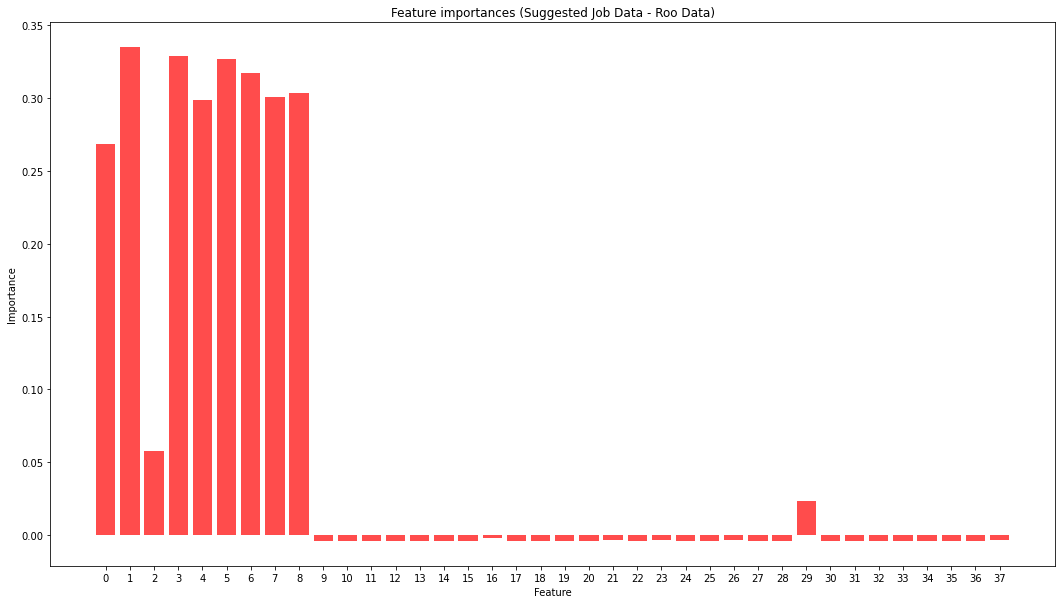

In [50]:
# Feature importances
f = []
for j in range(Xhat2.shape[1]):
  f_j = get_feature_importance(j, 100, mlpc5)
  f.append(f_j)
# Plot
plt.figure(figsize=(18,10))
plt.bar(range(Xhat2.shape[1]), f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances (Suggested Job Data - Roo Data)")
plt.show()

In [52]:
print('\033[1m'+"The important features according to the highest accuracy data and model are: "+ '\033[0m')
features_index = [0,1,3,4,5,6,7,8]
for col_num in features_index:
  # print(col_num)
  print(np.array(new_cluster_data.drop(['Job Labels','Cluster Labels'],axis=1).columns)[col_num])

The important features according to the highest accuracy data and model are: 
Acedamic percentage in Operating Systems
percentage in Algorithms
Percentage in Software Engineering
Percentage in Computer Networks
Percentage in Electronics Subjects
Percentage in Computer Architecture
Percentage in Mathematics
Percentage in Communication skills


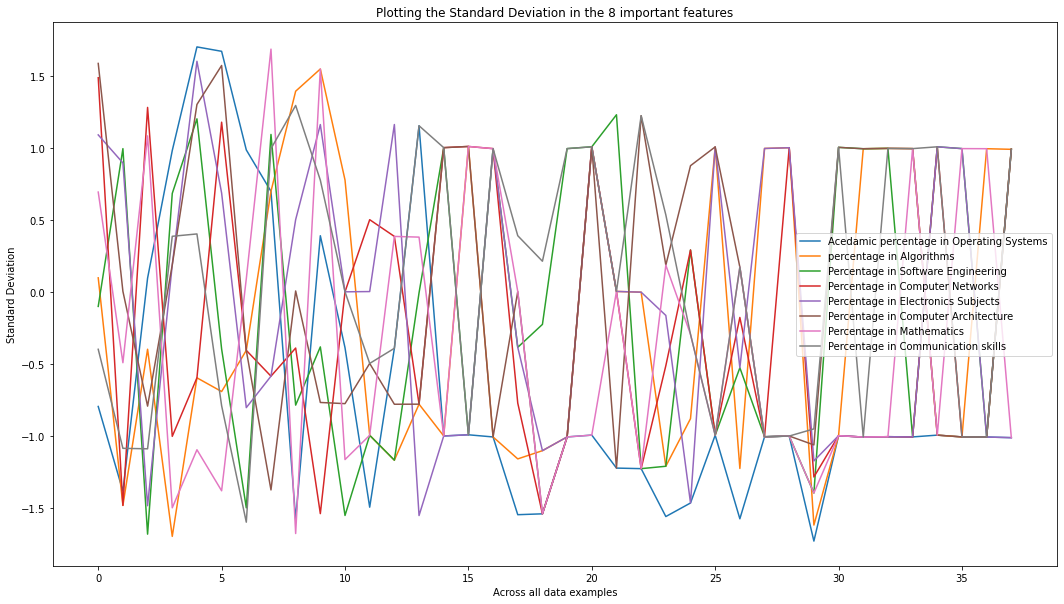

In [53]:
# plotting the standard deviations for the 8 important attributes or features according to the MLP ANN Classifier
fig, ax = plt.subplots(figsize=(18, 10))

plt.plot(Xhat2[0],label = 'Acedamic percentage in Operating Systems')
plt.plot(Xhat2[1],label = 'percentage in Algorithms')
plt.plot(Xhat2[3],label = 'Percentage in Software Engineering')
plt.plot(Xhat2[4],label = 'Percentage in Computer Networks')
plt.plot(Xhat2[5],label = 'Percentage in Electronics Subjects')
plt.plot(Xhat2[6],label = 'Percentage in Computer Architecture')
plt.plot(Xhat2[7],label = 'Percentage in Mathematics')
plt.plot(Xhat2[8],label = 'Percentage in Communication skills')
plt.legend()
plt.title("Plotting the Standard Deviation in the 8 important features")
plt.ylabel("Standard Deviation")
plt.xlabel("Across all data examples")
plt.show()

Thus the highest accuracy cluster labelled data based model only focusses on segmenting the students based on their marks in different elective subjects therefore it does not serve the purpose of the end goal here, that is, suggesting a suitable job role. <br>
For a job role, we need to specifically find a job based on the subjects or courses the student scores the highest in besides other factors like team spirit, coding skills rating, logical quotient rating etc. available as data attributes. <br>
Here in this cluster data, the optimal 9 clusters include all the original 34 classes in each of its clusters. Hence, even though it has achieved high accuracy, it cannot be used to suggest a suitable job role to a student candidate.

The concept of machine learning is to use statistical analysis to assign optimal weights. Thus, interfering here with the whole concept to apply manual weights to different features, you need really strong evidence that this is crucial to the process you are trying to model, and for some reason your model is currently missing it. Also attribute weighting is a rare technique while feeding it to different models and hence not much researched.

# **Printing the Jupyter Notebook code as PDF report**

In [59]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('AI_Assignment4_MT20075.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/AI_Assignment4_MT20075.ipynb to pdf
[NbConvertApp] Support files will be in AI_Assignment4_MT20075_files/
[NbConvertApp] Making directory ./AI_Assignment4_MT20075_files
[NbConvertApp] Making directory ./AI_Assignment4_MT20075_files
[NbConvertApp] Making directory ./AI_Assignment4_MT20075_files
[NbConvertApp] Making directory ./AI_Assignment4_MT20075_files
[NbConvertApp] Making directory ./AI_Assignment4_MT20075_files
[NbConvertApp] Writing 202335 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 670230 bytes to /content/d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'